$$CLUSTER\:\:SIZE\:\:DISTR$$

In [4]:
#We generate various n(s, pc, L)

#library
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter
from get_microjams import microjams
 
start = time.time()

L_array = np.array([100, 500, 1000, 10000])#, 20000])
cluster_size_count = np.zeros((len(L_array),(L_array[len(L_array)-1])*(L_array[len(L_array)-1])))

def add_to_cluster_size_count(arr, indice):
    
    current_sum = 0
    for num in arr:
        if num != 0:
            current_sum += num
        elif current_sum != 0:
            cluster_size_count[indice, int(current_sum - 1)] += 1
            current_sum = 0
    
    # Add the last cluster if it exists
    if current_sum != 0:
        cluster_size_count[indice, int(current_sum - 1)] += 1



trial = 1000

rho = 0.5 #upto three decimal places.. and rho <= 0.5

for aleph in range(len(L_array)):

    N = L_array[aleph] ####

    #we do first trial and set our counter

    #generation of initial_conditions with given rho

    for gamma in range(trial):
        ini_1 = np.ones(int(rho*N))
        ini_2 = np.zeros(N- int(rho*N))
        ini = np.concatenate((ini_1,ini_2))
        np.random.shuffle(ini)
        
        micro_jams_store = microjams(ini, rho, N)
        
        add_to_cluster_size_count(micro_jams_store, aleph)



end = time.time()


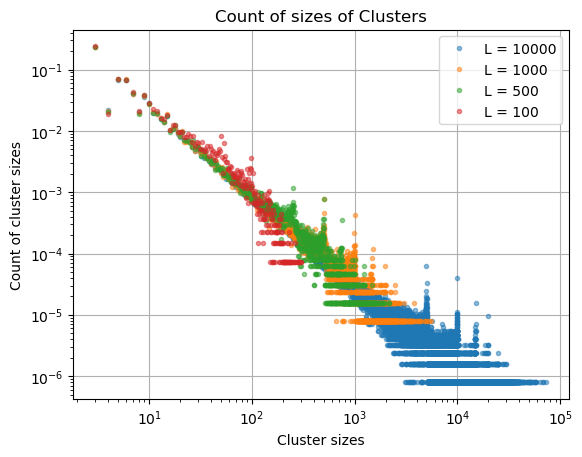

In [10]:
plt.figure()

for aleph in reversed(range(len(L_array))):
    
    non_zero_indices = np.nonzero(cluster_size_count[aleph, :])[0] #much faster than the list comprehension code!!
    
    # Increment the indices by 1 for x (as you did with i+1)
    x = non_zero_indices + 1
    
    # Use the same non_zero_indices to get the corresponding y values
    y = cluster_size_count[aleph, non_zero_indices]
    
    y = y / np.sum(y)
    
    #x = [i+1 for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0] #commented out because too slow for L = 20000
    #y = [cluster_size_count[aleph,i] for i in range(len(cluster_size_count[aleph,:])) if cluster_size_count[aleph,i] != 0]

    x = np.array(x)
    y = np.array(y)
    #Plot the counts as a function of the values
    #plt.loglog(np.arange(len(cluster_count)), cluster_count/trial,  marker='o', linestyle = 'none')
    plt.loglog(x, y, marker='.', linestyle = 'none', label = 'L = '+str(L_array[aleph]), alpha = 0.5)

plt.xlabel('Cluster sizes')
plt.ylabel('Count of cluster sizes')
plt.title('Count of sizes of Clusters')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

Cluster size distribution saved to 'cluster_size_distribution_rho_0pt5.xlsx'.


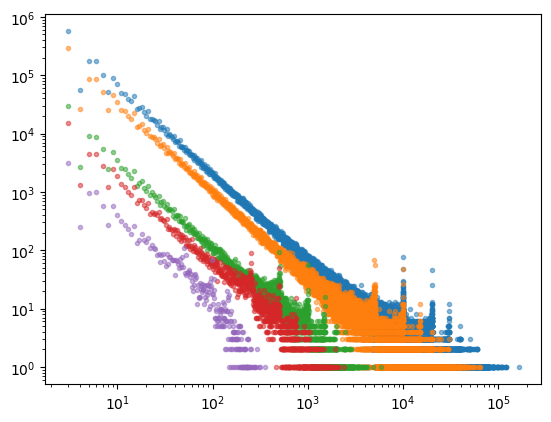

In [9]:
import pandas as pd

# Create an empty dictionary to store data
data_dict = {}

# For each L, store the x and y values in the dictionary
for aleph in reversed(range(len(L_array))):
    # Use np.nonzero to find indices where the cluster_size_count is not zero
    non_zero_indices = np.nonzero(cluster_size_count[aleph, :])[0] #much faster than the list comprehension code!!
    
    # Increment the indices by 1 for x (as you did with i+1)
    x = non_zero_indices + 1
    
    # Use the same non_zero_indices to get the corresponding y values
    y = cluster_size_count[aleph, non_zero_indices]
    
    #x = [i + 1 for i in range(len(cluster_size_count[aleph, :])) if cluster_size_count[aleph, i] != 0] #commented out due to being slow
    #y = [cluster_size_count[aleph, i] for i in range(len(cluster_size_count[aleph, :])) if cluster_size_count[aleph, i] != 0]
    
    #x = np.array(x)
    #y = np.array(y)
    
    # Add the x and y values to the dictionary
    data_dict[f'Cluster sizes (L={L_array[aleph]})'] = x
    data_dict[f'Counts (L={L_array[aleph]})'] = y

# Convert the dictionary to a DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data_dict.items()]))

# Save the DataFrame to an Excel file
df.to_excel('cluster_size_distribution_rho_0pt5.xlsx', index=False)

print("Cluster size distribution saved to 'cluster_size_distribution_rho_0pt5.xlsx'.")

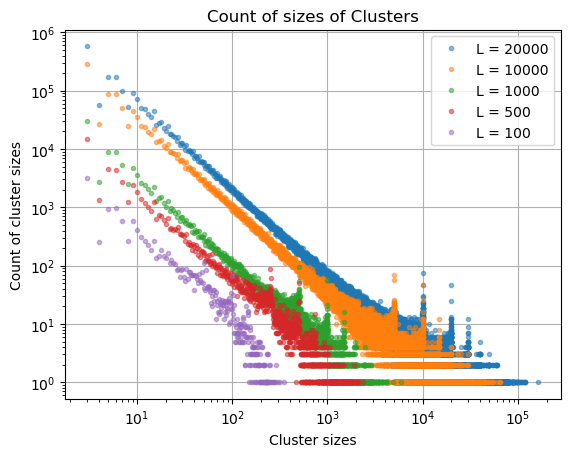

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_name = 'cluster_size_distribution_rho_0pt5.xlsx'
df = pd.read_excel(file_name)

# Find unique L values from the column names in the file
L_array = [int(col.split('=')[1].split(')')[0]) for col in df.columns if 'Cluster sizes' in col]

# Plot the data for each L
plt.figure()

for aleph in range(len(L_array)):
    # Get the x and y data for this L
    x = df[f'Cluster sizes (L={L_array[aleph]})'].dropna().values
    y = df[f'Counts (L={L_array[aleph]})'].dropna().values

    # Plot the data
    plt.loglog(x, y, marker='.', linestyle='none', label=f'L = {L_array[aleph]}', alpha=0.5)

# Add labels and title
plt.xlabel('Cluster sizes')
plt.ylabel('Count of cluster sizes')
plt.title('Count of sizes of Clusters')
plt.legend(loc='best')
plt.grid(True)
plt.show()

$$CLUSTER\:\:LIFETIMES$$

In [11]:
#Generating data for cluster lifetimes - 
#We generate various n_lifetime(s, pc, L)
#first we get the lifetime distribution over a larger number of initial condition - 


#library
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter
from get_microjams import microjams
 
start = time.time()

L_array = np.array([100, 500, 1000, 10000, 20000])
cluster_lifetime_count = np.zeros((len(L_array),L_array[len(L_array)-1]))

#Lifetime count structure - 

def add_to_cluster_lifetime_count(arr, indice):
    current_max = 0

    for num in arr:
        if num != 0:
            current_max = max(current_max, num)
        elif current_max != 0:
            cluster_lifetime_count[indice, int(current_max -1)] += 1
            current_max = 0
    
    # Add the last cluster if it exists
    if current_max != 0:
        cluster_lifetime_count[indice, int(current_max-1)] += 1



trial = 1000

rho = 0.5 #upto three decimal places.. and rho <= 0.5

for aleph in range(len(L_array)):

    N = L_array[aleph] ####

    #we do first trial and set our counter
    #generation of initial_conditions with given rho

    for gamma in range(trial):
        ini_1 = np.ones(int(rho*N))
        ini_2 = np.zeros(N- int(rho*N))
        ini = np.concatenate((ini_1,ini_2))
        np.random.shuffle(ini)
        
        micro_jams_store = microjams(ini, rho, N)
        add_to_cluster_lifetime_count(micro_jams_store, aleph)



end = time.time()

In [12]:
#saving the cluster lifetime data
import pandas as pd

# Create an empty dictionary to store data
lifetime_data_dict = {}

# For each L, store the x (lifetime) and y (counts) values in the dictionary
for aleph in reversed(range(len(L_array))):
    # Use np.nonzero to find indices where the cluster_lifetime_count is not zero
    non_zero_indices = np.nonzero(cluster_lifetime_count[aleph, :])[0] # faster than list comprehension

    # Increment the indices by 1 for x (as you did with i+1)
    x = non_zero_indices + 1
    
    # Use the same non_zero_indices to get the corresponding y values
    y = cluster_lifetime_count[aleph, non_zero_indices]
    
    # Add the x (lifetime) and y (counts) values to the dictionary
    lifetime_data_dict[f'Cluster lifetimes (L={L_array[aleph]})'] = x
    lifetime_data_dict[f'Counts (L={L_array[aleph]})'] = y

# Convert the dictionary to a DataFrame
df_lifetime = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in lifetime_data_dict.items()]))

# Save the DataFrame to an Excel file
df_lifetime.to_excel('cluster_lifetime_distribution_rho_0pt5.xlsx', index=False)

print("Cluster lifetime distribution saved to 'cluster_lifetime_distribution_rho_0pt5.xlsx'.")


Cluster lifetime distribution saved to 'cluster_lifetime_distribution_rho_0pt5.xlsx'.


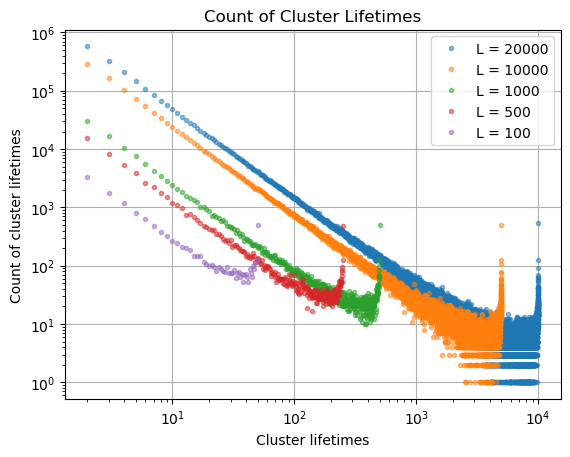

In [13]:
#plotting the cluster lifetime - 

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file for cluster lifetimes
file_name = 'cluster_lifetime_distribution_rho_0pt5.xlsx'
df = pd.read_excel(file_name)

# Find unique L values from the column names in the file
L_array = [int(col.split('=')[1].split(')')[0]) for col in df.columns if 'Cluster lifetimes' in col]

# Plot the data for each L
plt.figure()

for aleph in range(len(L_array)):
    # Get the x (lifetime) and y (counts) data for this L
    x = df[f'Cluster lifetimes (L={L_array[aleph]})'].dropna().values
    y = df[f'Counts (L={L_array[aleph]})'].dropna().values

    # Plot the data
    plt.loglog(x, y, marker='.', linestyle='none', label=f'L = {L_array[aleph]}', alpha=0.5)

# Add labels and title
plt.xlabel('Cluster lifetimes')
plt.ylabel('Count of cluster lifetimes')
plt.title('Count of Cluster Lifetimes')
plt.legend(loc='best')
plt.grid(True)
plt.show()


$$MICROJAM\:\:\:DISTRIBUTION$$

In [30]:
#Now we generate, save and plot the data for the microjam distribution - 
#We generate various n_microjam(s, pc, L)

#library
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter
from get_microjams import microjams
 
start = time.time()

L_array = np.array([100, 500, 1000, 10000, 20000])
cluster_microjam_count = np.zeros((len(L_array),L_array[len(L_array)-1]))

#Lifetime count structure - 

def add_to_cluster_microjam_count(arr, indice):
    for num in arr:
        if num != 0:
            cluster_microjam_count[indice, int(num -1)] += 1



trial = 1000

rho = 0.5 #upto three decimal places.. and rho <= 0.5

for aleph in range(len(L_array)):

    N = L_array[aleph] ####

    #we do first trial and set our counter
    #generation of initial_conditions with given rho

    for gamma in range(trial):
        ini_1 = np.ones(int(rho*N))
        ini_2 = np.zeros(N- int(rho*N))
        ini = np.concatenate((ini_1,ini_2))
        np.random.shuffle(ini)
        
        micro_jams_store = microjams(ini, rho, N)
        add_to_cluster_microjam_count(micro_jams_store, aleph)

end = time.time()


In [31]:
#saving the microjam distr
import pandas as pd

# Create an empty dictionary to store data
microjam_data_dict = {}

# For each L, store the x (microjam sizes) and y (counts) values in the dictionary
for aleph in range(len(L_array)):
    # Use np.nonzero to find indices where the cluster_microjam_count is not zero
    non_zero_indices = np.nonzero(cluster_microjam_count[aleph, :])[0]

    # Increment the indices by 1 for x (as you did with i+1)
    x = non_zero_indices + 1
    
    # Use the same non_zero_indices to get the corresponding y values
    y = cluster_microjam_count[aleph, non_zero_indices]
    
    # Add the x (microjam sizes) and y (counts) values to the dictionary
    microjam_data_dict[f'Microjam sizes (L={L_array[aleph]})'] = x
    microjam_data_dict[f'Counts (L={L_array[aleph]})'] = y

# Convert the dictionary to a DataFrame
df_microjam = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in microjam_data_dict.items()]))

# Save the DataFrame to an Excel file
df_microjam.to_excel('microjam_size_distribution_rho_0pt5.xlsx', index=False)

print("Microjam size distribution saved to 'microjam_size_distribution_rho_0pt5.xlsx'.")


Microjam size distribution saved to 'microjam_size_distribution_rho_0pt5.xlsx'.


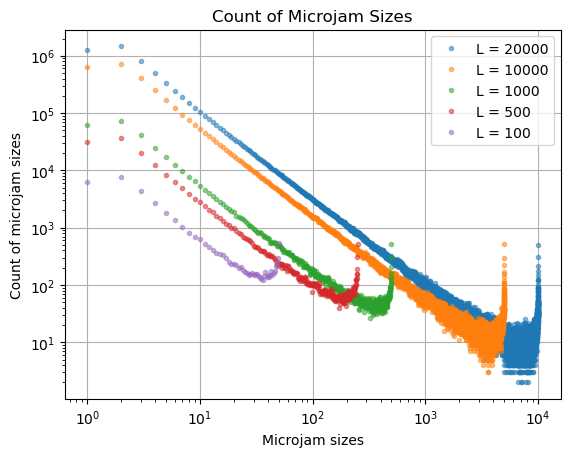

In [34]:
#Now we plot our microjams from the saved file - 

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file for microjam sizes
file_name = 'microjam_size_distribution_rho_0pt5.xlsx'
df = pd.read_excel(file_name)

# Find unique L values from the column names in the file
L_array = [int(col.split('=')[1].split(')')[0]) for col in df.columns if 'Microjam sizes' in col]

# Plot the data for each L
plt.figure()

for aleph in reversed(range(len(L_array))):
    # Get the x (microjam sizes) and y (counts) data for this L
    x = df[f'Microjam sizes (L={L_array[aleph]})'].dropna().values
    y = df[f'Counts (L={L_array[aleph]})'].dropna().values

    # Plot the data
    plt.loglog(x, y, marker='.', linestyle='none', label=f'L = {L_array[aleph]}', alpha=0.5)
    

# Add labels and title
plt.xlabel('Microjam sizes')
plt.ylabel('Count of microjam sizes')
plt.title('Count of Microjam Sizes')
plt.legend(loc='best')
plt.grid(True)
plt.show()
